In [1]:
import glob, os
import numpy as np
import json
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

parent_dir_female = r"female_g"
parent_dir_male = r"male_g"

In [2]:
def greater_than_65(val1,val2):
    if (val1 >= (val2 + 0.65*val2)) or (val2 >= (val1 + 0.65*val1)):
        return True
    else:
        return False

In [3]:
# given a path, create a dcitionary of the occuring (ID,value) pairs
def get_dict(path):
    new_dict = {}
    for json_file in glob.glob(os.path.join(path, '*.json')):
        reads = json.loads(open(json_file).read())
        for x in reads:
            if x not in new_dict:
                new_dict[x] = reads[x]
            else:
                new_dict[x]+=reads[x]
        
    return new_dict

In [4]:
female_dict = {}
female_dict = get_dict(parent_dir_female)

male_dict = {}
male_dict = get_dict(parent_dir_male)

In [5]:
# only select the taxons that have value in range of [val1, val2] 
def extract_vals_in_range(dictionary,val1,val2):
    new_dict = {}
    for i in dictionary:
        if dictionary[i]<=val1 and dictionary[i] >= val2:
            new_dict[i] = dictionary[i]
    return new_dict

In [6]:
common_dict = extract_vals_in_range(male_dict,150,50)
common_dict_female = extract_vals_in_range(female_dict,150,50)
common_dict.update(common_dict_female)

In [7]:
# need to specify both the paths as the function will iterate through all the files in that location and collect the values of
# the keys that appear in the dictionary and select the ones which have variances greater than the one specified as parameter. 
# RETURN TYPE : a list of all the taxons that have variances in given range 

def get_taxons_by_variances(dictionary,path1,path2,var1,var2):
    tot_var = {}
    
    #tot_var will hold the value of every single occurence in the files corresponding to every key in the dictionary
    for i in dictionary.keys():
        new_list = []
        for json_file in glob.glob(os.path.join(path1, '*.json')):
            reads = json.loads(open(json_file).read())
            for x in reads:
                if x==i:
                    new_list.append(reads[x])
                    
        for json_file in glob.glob(os.path.join(path2, '*.json')):
            reads = json.loads(open(json_file).read())
            for y in reads:
                if y==i:
                    new_list.append(reads[y])
        tot_var[i] = new_list  
      
    # now that we have the vectors, find the variance of the vectors and select the ones that are in the given range
    for i in tot_var:
        variance = np.var(tot_var[i])
        tot_var[i] = variance
    filtered_list = []
    sorted_var = sorted((value, key) for (key,value) in tot_var.items())
    for i in sorted_var:
        if i[0] > var1 and i[0] < var2:
            filtered_list.append(i[1])
    return ((filtered_list))

In [8]:
variance_filtered_list = get_taxons_by_variances(common_dict, parent_dir_male, parent_dir_female,6,150)
variance_filtered_list

['1016',
 '836',
 '158846',
 '570',
 '89966',
 '442430',
 '1763',
 '1847725',
 '1243',
 '846',
 '508459',
 '517',
 '28250',
 '64895',
 '194',
 '416916',
 '2701',
 '1647',
 '12916',
 '1378',
 '294702',
 '32008',
 '29580',
 '662',
 '157',
 '1883',
 '165695',
 '583',
 '1677050',
 '644652',
 '407',
 '32067',
 '34019',
 '44249',
 '33071',
 '1582879']

In [9]:
# Creates the dataframe from a given path having only the taxons selected from the variance filtered list.

def create_table(path,filtered_list,label):
    vector_to_feed = []
    label_list = []
    for json_file in glob.glob(os.path.join(path, '*.json')):
        reads = json.loads(open(json_file).read())
        local_list = []
        for x in reads:
            if x in filtered_list:
                local_list.append(reads[x])
                if x not in label_list:
                    label_list.append(x)
        vector_to_feed.append(local_list)
    df = pd.DataFrame(vector_to_feed)
    df.columns = label_list
    df['Label'] = label
    return df




In [10]:
# Make the male and female dataframes. 
df_fe = create_table(parent_dir_female,variance_filtered_list,0)
df_ma = create_table(parent_dir_male, variance_filtered_list, 1)

In [11]:
df_fe

,1016,1243,12916,1378,157,1582879,158846,1647,165695,1677050,...,517,570,583,644652,64895,662,836,846,89966,Label
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,10,0,3,0,14,0,1,2,3,0,...,10,1,0,8,0,1,6,0,6,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,1,0,0,3,0,3,0,0,1,...,0,0,3,0,0,4,1,0,0,0
7,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,12,0,0
9,0,1,0,0,0,120,1,0,0,0,...,2,0,1,0,0,4,0,0,0,0


In [12]:
# Concatenate the female and male dataframes in result_df 
frames=[df_ma,df_fe]
result_df = pd.concat(frames)
len(result_df)
indexing = np.arange(0,250,1)
result_df.index = indexing

ValueError: Length mismatch: Expected axis has 200 elements, new values have 250 elements

In [14]:
len(result_df.columns)

37

In [15]:
# Use random forest classifier to get the imprtance of the various taxons in the dataframe. 

def get_importance(dataframe, i):
    accuracy = []
    accuracy_plot=[]
    d_trees=[]
    imp_dict = dict() 
    for i in range(i):
        X_train, X_test, y_train, y_test = train_test_split(dataframe.iloc[:,0:-1],dataframe['Label'],test_size = 0.20)
        rfc = RandomForestClassifier(n_estimators = 15, max_depth = 30)
        rfc.fit(X_train, y_train)
        predict_rfc = rfc.predict(X_test)
        count_rfc = 0
        for j in range(len(predict_rfc)):
            if predict_rfc[j] == y_test.iloc[j]:
                count_rfc = count_rfc + 1;
        accuracy_rfc = count_rfc/(len(predict_rfc))
        accuracy.append(accuracy_rfc)
        accuracy_plot.append(accuracy_rfc)
#         d_trees.append(rfc.estimators_)
        feature_importances = pd.DataFrame(rfc.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending = False)
#         print(feature_importances.loc['1380']["importance"])
        index_list = (feature_importances.index.tolist())
#         print(index_list)
        for j in index_list:
            if j not in imp_dict:
                imp_dict[j] = feature_importances.loc[j]["importance"]
            else:
                imp_dict[j] += (feature_importances.loc[j]["importance"])
    return sorted(((value,key) for (key,value) in imp_dict.items()),reverse=True)

In [ ]:
imp_dict = get_importance(result_df,1000)

In [ ]:
imp_dict_keys =[imp_dict[i][1] for i in range(len(imp_dict))]
imp_dict

In [37]:
imp_dict_values = [imp_dict[i][0] for i in range(len(imp_dict))]

Text(0.5,0,'Taxons')

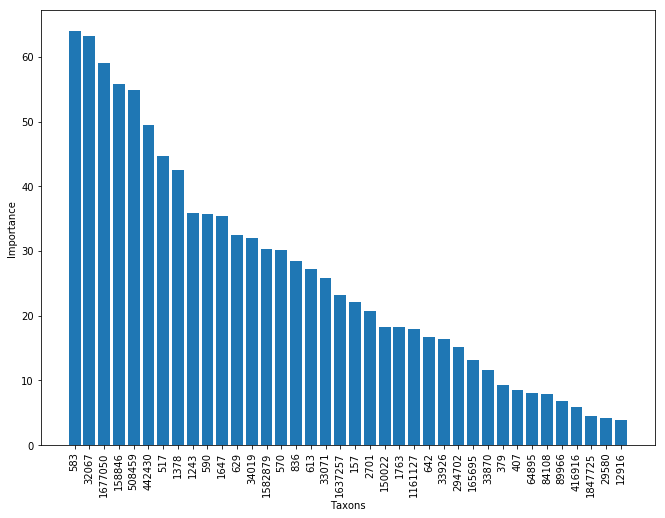

In [44]:
# Plot the importance of features. 

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(11,8))
plt.bar(imp_dict_keys, imp_dict_values)
plt.xticks(np.arange(len(imp_dict)), imp_dict_keys, rotation=90)
plt.ylabel("Importance")
plt.xlabel("Taxons")

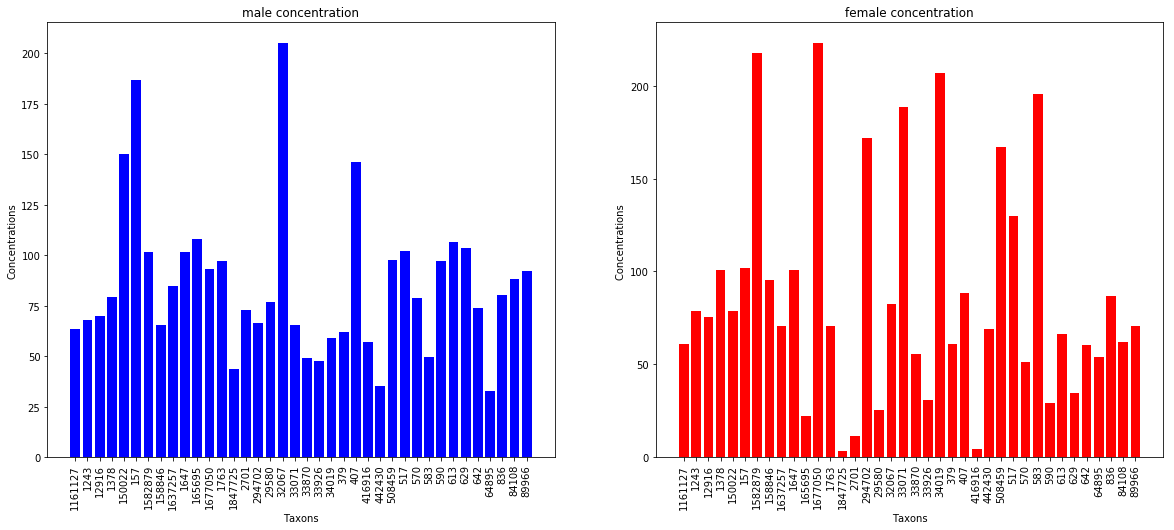

In [45]:
# Get the concentrations by iterating over the path and summing up the jsons. 
# Normalizing the values so that they have the same scale. 

concentration_male = dict()
concentration_female = dict()

for json_file in glob.glob(os.path.join(parent_dir_female, '*.json')):
    reads = json.loads(open(json_file).read())
        # print(reads)
    for x in reads:
        if x in variance_filtered_list:
            if x not in concentration_female:
                concentration_female[x] = reads[x]
            else:
                concentration_female[x]+=reads[x]


for json_file in glob.glob(os.path.join(parent_dir_male, '*.json')):
    reads = json.loads(open(json_file).read())
    # print(reads)
    for x in reads:
        if x in variance_filtered_list:
            if x not in concentration_male:
                concentration_male[x] = reads[x]
            else:
                concentration_male[x]+=reads[x]


female_vals = concentration_female.values()
female_vals = [float(i)/113*100 for i in female_vals]
male_vals = concentration_male.values()
male_vals = [float(j)/137*100 for j in male_vals]

fig = plt.figure(figsize=(20,8))
fig.add_subplot(121)
plt.bar(concentration_male.keys(), male_vals, color='b')
plt.title("male concentration")
plt.ylabel("Concentrations")
plt.xlabel("Taxons")
plt.xticks(rotation='vertical')

fig.add_subplot(122)
plt.bar(concentration_female.keys(), female_vals, color='r')
plt.xticks(rotation='vertical')
plt.title("female concentration")
plt.xlabel("Taxons")
plt.ylabel("Concentrations ")
plt.show()